In [2]:
import os
import json
import random
import shutil
from glob import glob
from tqdm import tqdm
from util import get_parent_dir_name

In [3]:
def read_json_as_dict(json_path):
    json_file = open(json_path, encoding="utf-8")
    json_str = json_file.read()
    json_dict = json.loads(json_str)
    
    return json_dict

In [4]:
train_image_folder_path = "../data/1. Single Person/train"
valid_image_folder_path = "../data/1. Single Person/valid"

split_image_folder_path = "../data/2. Split Data"

train_annotation_dict = read_json_as_dict("../data/1. Single Person/single_person_keypoints_train2017.json")
valid_annotaion_dict = read_json_as_dict("../data/1. Single Person/single_person_keypoints_val2017.json")

phase_list = ["no_person", "single_person", "multi_person"]
split_phase_list = ["train", "valid", "test"] 

# Copy no person Image

In [60]:
train_ratio = 0.95
valid_ratio = 0.05

for phase in phase_list:
    image_path_list = glob(f"{train_image_folder_path}/{phase}/*.*")
    random.shuffle(image_path_list)
    image_num = len(image_path_list)
    train_num = int(round(train_ratio * image_num))
    for image_idx, image_path in enumerate(image_path_list):
        image_basename = get_parent_dir_name(image_path, level=0)
        
        if image_idx < train_num:
            split_phase = "train"
        else:
            split_phase = "valid"
        target_image_folder = f"{split_image_folder_path}/{split_phase}/{phase}"
        os.makedirs(target_image_folder, exist_ok=True)
        shutil.copy(image_path, f"{target_image_folder}/{image_basename}")

In [53]:
image_path_list

['../data/1. Single Person/train/no_person\\000000000009.jpg',
 '../data/1. Single Person/train/no_person\\000000000025.jpg',
 '../data/1. Single Person/train/no_person\\000000000030.jpg',
 '../data/1. Single Person/train/no_person\\000000000034.jpg',
 '../data/1. Single Person/train/no_person\\000000000042.jpg',
 '../data/1. Single Person/train/no_person\\000000000061.jpg',
 '../data/1. Single Person/train/no_person\\000000000064.jpg',
 '../data/1. Single Person/train/no_person\\000000000071.jpg',
 '../data/1. Single Person/train/no_person\\000000000072.jpg',
 '../data/1. Single Person/train/no_person\\000000000073.jpg',
 '../data/1. Single Person/train/no_person\\000000000074.jpg',
 '../data/1. Single Person/train/no_person\\000000000078.jpg',
 '../data/1. Single Person/train/no_person\\000000000081.jpg',
 '../data/1. Single Person/train/no_person\\000000000089.jpg',
 '../data/1. Single Person/train/no_person\\000000000092.jpg',
 '../data/1. Single Person/train/no_person\\00000000009

# Copy Single Person Image

In [6]:
target_folder = f"{split_image_folder_path}/test"

for image_id, annotation_list in valid_annotaion_dict.items():
    annotation_dict = annotation_list[0]
    keypoint_list = annotation_dict["keypoints"]
    break

In [33]:
keypoint_list[3 * keypoint_idx: 3 * keypoint_idx + 3]

[0, 0, 0]

In [34]:
len(keypoint_list)

51

In [13]:
from copy import deepcopy
temp = deepcopy(keypoint_list)

for idx in range(17):
    temp.pop(index=idx + 2)

In [16]:
temp[2::3]

[0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2]

In [17]:
len(temp[2::3])

17

In [39]:
for keypoint_idx in range(17):
    x_idx, y_idx, label = keypoint_list[3 * keypoint_idx: 3 * keypoint_idx + 3]
    if label == 0:
        continue
    break

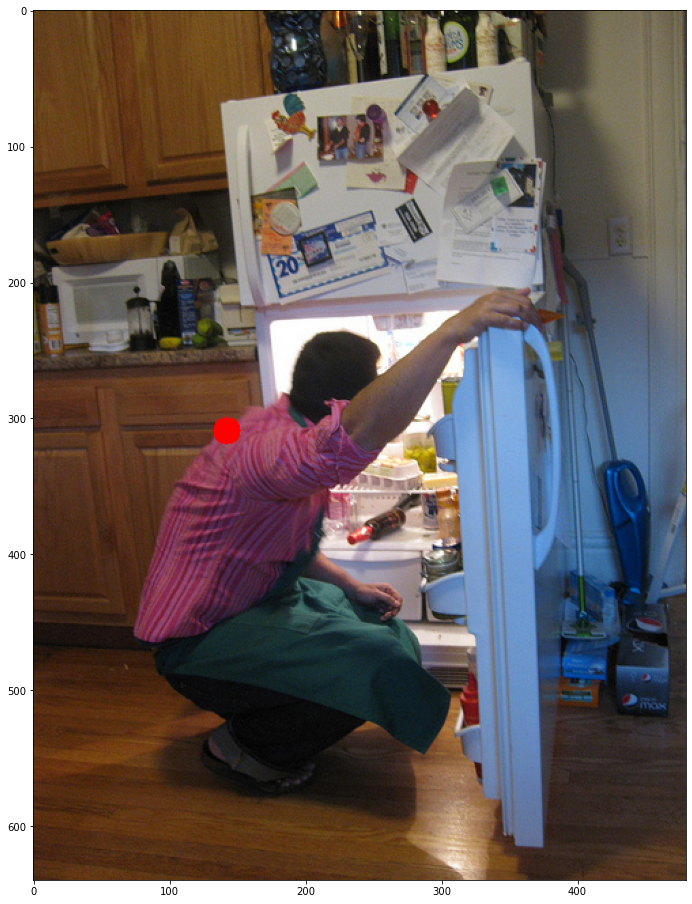

In [8]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

image_path = f"../data/val2017/{425226:012d}.jpg"
image_array = np.array(Image.open(image_path))

for keypoint_idx in range(17):
    x_idx, y_idx, label = keypoint_list[3 * keypoint_idx: 3 * keypoint_idx + 3]
    if label == 0:
        continue
    else:
        if label == 1:
            rgb_color = (255, 0, 0)
        if label == 2:
            rgb_color = (0, 0, 255)
        image_array = cv2.circle(image_array, (x_idx, y_idx), radius=10, color=rgb_color, thickness=-1)
        break
plt.figure(figsize=(16, 16))
plt.imshow(image_array)

In [9]:
x_idx, y_idx, label

(142, 309, 1)

In [24]:
annotation_dict["image_id"]

425226

In [8]:
image_id

'537548'

In [9]:
annotation_dict

[{'segmentation': [[267.03,
    243.78,
    314.59,
    154.05,
    357.84,
    136.76,
    374.05,
    104.32,
    410.81,
    110.81,
    429.19,
    131.35,
    420.54,
    165.95,
    451.89,
    209.19,
    464.86,
    240.54,
    480,
    253.51,
    484.32,
    263.24,
    496.22,
    271.89,
    484.32,
    278.38,
    438.92,
    257.84,
    401.08,
    216.76,
    370.81,
    247.03,
    414.05,
    277.3,
    433.51,
    304.32,
    443.24,
    323.78,
    400,
    362.7,
    376.22,
    375.68,
    400,
    418.92,
    394.59,
    424.32,
    337.3,
    382.16,
    337.3,
    371.35,
    388.11,
    327.03,
    341.62,
    301.08,
    311.35,
    276.22,
    304.86,
    263.24,
    294.05,
    249.19]],
  'num_keypoints': 8,
  'area': 28292.08625,
  'iscrowd': 0,
  'keypoints': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   325,
   160,
   2,
   398,
   177,
   2,
   0,
   0,
   0,
   437,
   238,
   2,
   0,
   0,
   0,
   477,
 